## $\Large{Data\; Visualization\; 練習題}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 範例資料

In [2]:
df = pd.read_csv("https://github.com/chris1610/pbpython/blob/master/data/Aussie_Wines_Plotting.csv?raw=true", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_color
77,Australia,This medium-bodied Chardonnay features aromas ...,Made With Organic Grapes,86,18.0,South Australia,South Australia,NaN,Joe Czerwinski,@JoeCz,Yalumba 2016 Made With Organic Grapes Chardonn...,Chardonnay,Yalumba,#440154
83,Australia,"Pale copper in hue, this wine exudes passion f...",Jester Sangiovese,86,20.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Mitolo 2016 Jester Sangiovese Rosé (McLaren Vale),Rosé,Mitolo,#450558
123,Australia,The blend is roughly two-thirds Shiraz and one...,Parson's Flat,92,40.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 Parson's Flat Shi...,Shiraz-Cabernet Sauvignon,Henry's Drive Vignerons,#460B5E
191,Australia,"From the little-known region of Padthaway, thi...",The Trial of John Montford,87,30.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 The Trial of John...,Cabernet Sauvignon,Henry's Drive Vignerons,#471163
232,Australia,Lifted cedar and pine notes interspersed with ...,Red Belly Black,85,12.0,South Australia,South Australia,NaN,NaN,NaN,Angove's 2006 Red Belly Black Shiraz (South Au...,Shiraz,Angove's,#471669


## Exercise 1
請畫出資料中points欄位的直方圖，並主動設定分組數量為20

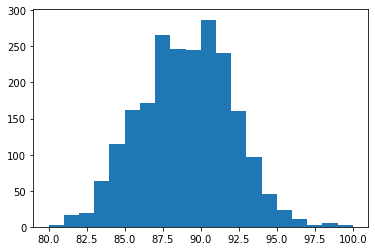

In [3]:
plt.hist(df.points, bins=20)
plt.show()

## Exercise 2
觀察points與price之間的散佈圖

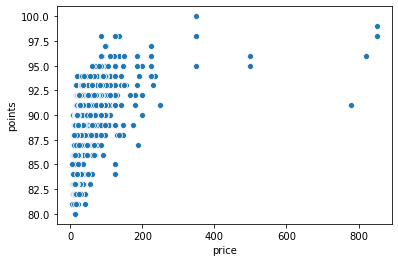

In [4]:
sns.scatterplot('price', 'points', data=df)

## Exercise 3
請計算並畫出df資料中各個region_1出現次數的長條圖，並使用plt.xticks將長條圖標記旋轉60度

(為避免長條圖數量過多，可在整理資料時只篩選前六名)

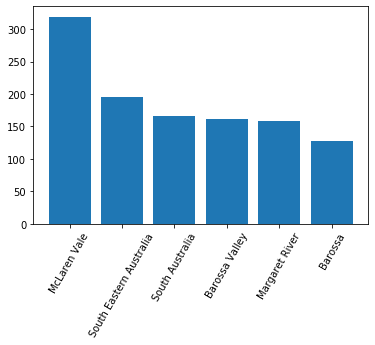

In [5]:
vc = df.region_1.value_counts()
plt.bar(vc.index[:6], vc.values[:6])
plt.xticks(rotation=60)
plt.show()

## Exercise 4
請依照每個省份(province)分別繪製一張points的機率密度函數圖。

註：你可以使用subplot的方式，也可以直接使用FacetGrid作圖

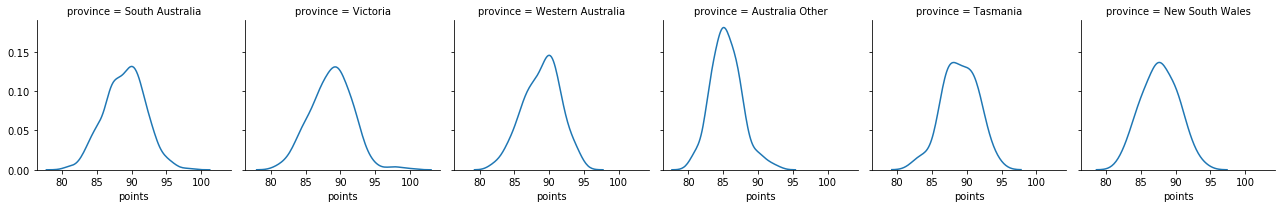

In [6]:
g = sns.FacetGrid(data=df, col='province')

g = g.map(sns.kdeplot, 'points')

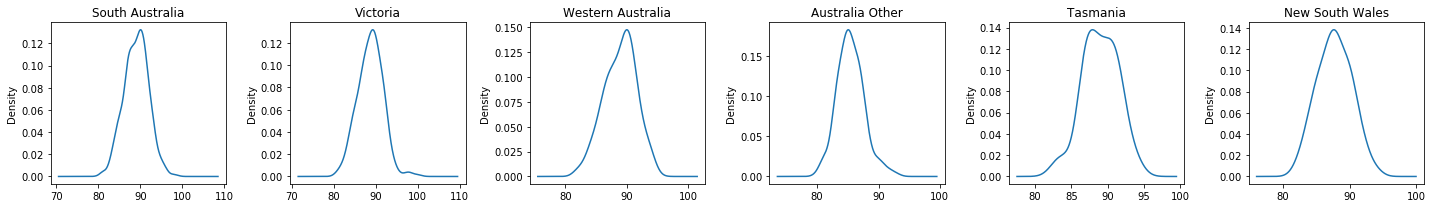

In [7]:
plt.figure(figsize=(20, 3))
unique_province = df.province.unique()
n_unique = len(unique_province)
for i in range(n_unique):
    plt.subplot(1, n_unique, i + 1)
    df[df.province == unique_province[i]]['points'].plot.kde()
    plt.title(unique_province[i])
    plt.tight_layout()

---

## 範例資料 2

此份資料蒐集了google play store 中約一萬筆App的資料，若對資料敘述有興趣可至以下網站查看更多資訊。

Credit: https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv

In [8]:
df = pd.read_csv('../dataset/googleplaystore.csv')

# 將評分人數統一改為數字型態
df['Reviews'] = df.Reviews.str.replace('3.0M', '300000').astype('int')

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Exercise 5
請繪製評分分數(Rating)評分人數(Reviews)的散佈圖，並且將不同的App付費類型(Type)以不同顏色標示

- 註：有沒有發現甚麼比較奇怪的事情?

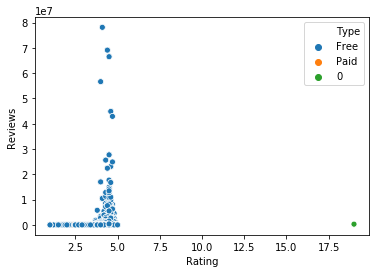

In [15]:
sns.scatterplot('Rating', 'Reviews', data=df, hue='Type')

## Exercise 6

請挑出資料中類別(Category)為FAMILY、GAME、以及TOOLS的App資料，並且分別繪製這三個類型評分分數(Rating)的小提琴圖。

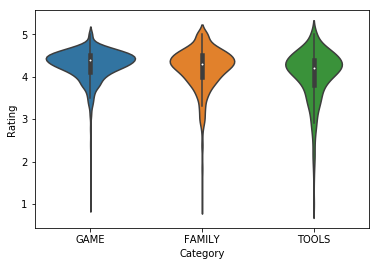

In [13]:
sns.violinplot('Category', 'Rating', data=df[df.Category.isin(['FAMILY', 'GAME', 'TOOLS'])])

## Exercise 7
將資料中付費類型(Type)與年齡層(Content Rating)內各組的平均評分(Rating)繪製成熱力圖。

註：你必須先使用pivot_table方法整理資料

In [14]:
df_pivot = df.pivot_table(values='Rating', index='Type', columns='Content Rating')

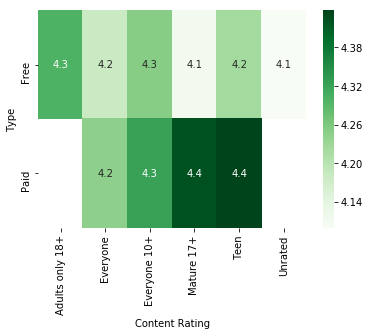

In [15]:
sns.heatmap(df_pivot, annot=True, cmap="Greens")

## Exercise 8
下圖呈現不同類別與付費類型的App在評分上的差異，圖中的x軸為App類別(Category，只需挑選FAMILY, GAME, TOOLS三類)，y軸為評分分數(Rating)的最小值，顏色則為付費類型(Type)。請繪製出此圖。

<img src="../Slides_image/exercise_8.PNG" width=600/>

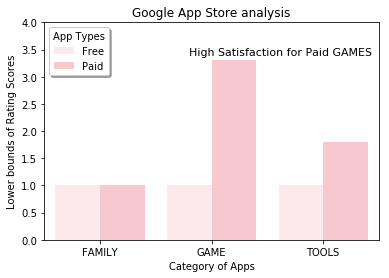

In [16]:
plot_data = df[df.Category.isin(['FAMILY', 'GAME', 'TOOLS'])].groupby(['Type', 'Category'], as_index=False).Rating.min()
sns.barplot('Category', 'Rating', data=plot_data, hue='Type', color='pink')
plt.legend(loc='upper left', title='App Types', shadow=0.3)
plt.text(0.8, 3.4, 'High Satisfaction for Paid GAMES', fontsize=11)
plt.ylim(0.0, 4.0)
plt.title('Google App Store analysis')
plt.xlabel('Category of Apps')
plt.ylabel('Lower bounds of Rating Scores')
plt.show()